# Análise da base de dados da AppleStore

base de dados: https://www.kaggle.com/datasets/calibr3io/applestore

## Sobre as colunas (características)

Este dataset contém 16 colunas (características)

1. id: Id do aplicativo
2. track_name: Nome do aplicativo
3. size_bytes: Tamanho do aplicativo
4. currency: O tipo de moeda (se for pago)
5. price: O preço do aplicativo (se tiver)
6. rating_count_tot: O rating total de todas as versões do aplicativo
7. rating_count_ver: O rating atual da última versão do aplicativo
8. user_rating: O rating médio de todos as versões do aplicativo
9. user_rating_ver: O rating médio atual da última versão do aplicativo
10. ver: Versão atual do aplicativo
11. cont_rating: Classificação do aplicativo
12. prime_genre: Gênero do aplicativo
13. sup_devices.num: Quantidade de celulares Apple que suporta este aplicativo
14. ipadSc_urls.num: Número de screenshots do aplicativo disponíveis para iPad
15. lang.num: Número de idiomas suportados pelo aplicativo
16. vpp_lic:  Indica se o aplicativo possui licenciamento do Volume Purchase Program (VPP)

# Análise de Dados

Pipeline

1. Coleta dos dados
2. Pré-processamento dos dados
3. Análise exploratória dos dados


In [234]:
# Removendo os warnings
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

## 1. Coleta dos dados

In [235]:
# Importando o pandas
import pandas as pd

# Obtendo os dados
data = pd.read_csv('/content/drive/MyDrive/Projetos/Data/datasets para estudar/AppleStore.csv')

In [236]:
# Exibindo os 5 primeiros dados
data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [237]:
# Exibindo os 5 últimos dados
data.tail()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.0,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.0,0,0,0.0,0.0,1.0.3,12+,Entertainment,40,0,1,1
7196,977965019,みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~,51174400,USD,0.0,0,0,0.0,0.0,1.4.0,4+,Food & Drink,37,0,1,1


In [238]:
# Aqui conseguimos ver melhor os tipos de dados e se há dados faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

## 2. Pré-processamento dos dados

A limpeza inicial que podemos fazer é remover a coluna 'currency' que não é importante para a análise já que todos os preços dos aplicativos estão em dolar.

In [239]:
# Analisando a frequência
data['currency'].describe()

count     7197
unique       1
top        USD
freq      7197
Name: currency, dtype: object

In [240]:
# Removendo o currency
data.drop(['currency'], axis=1, inplace=True)

Outra coluna que também não nos fará falta nesta análise é o 'id'.

In [241]:
# Removendo o id
data.drop(['id'], axis=1, inplace=True)

In [242]:
data.head(5)

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,Facebook,389879808,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,Instagram,113954816,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,Clash of Clans,116476928,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,Temple Run,65921024,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,Pandora - Music & Radio,130242560,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


## 3. Análise Exploratória dos dados

### 3.1. Quais são os gêneros e suas frequências?

In [243]:
# importando o pacote que usaremos para visualizar os dados
import matplotlib.pyplot as plt

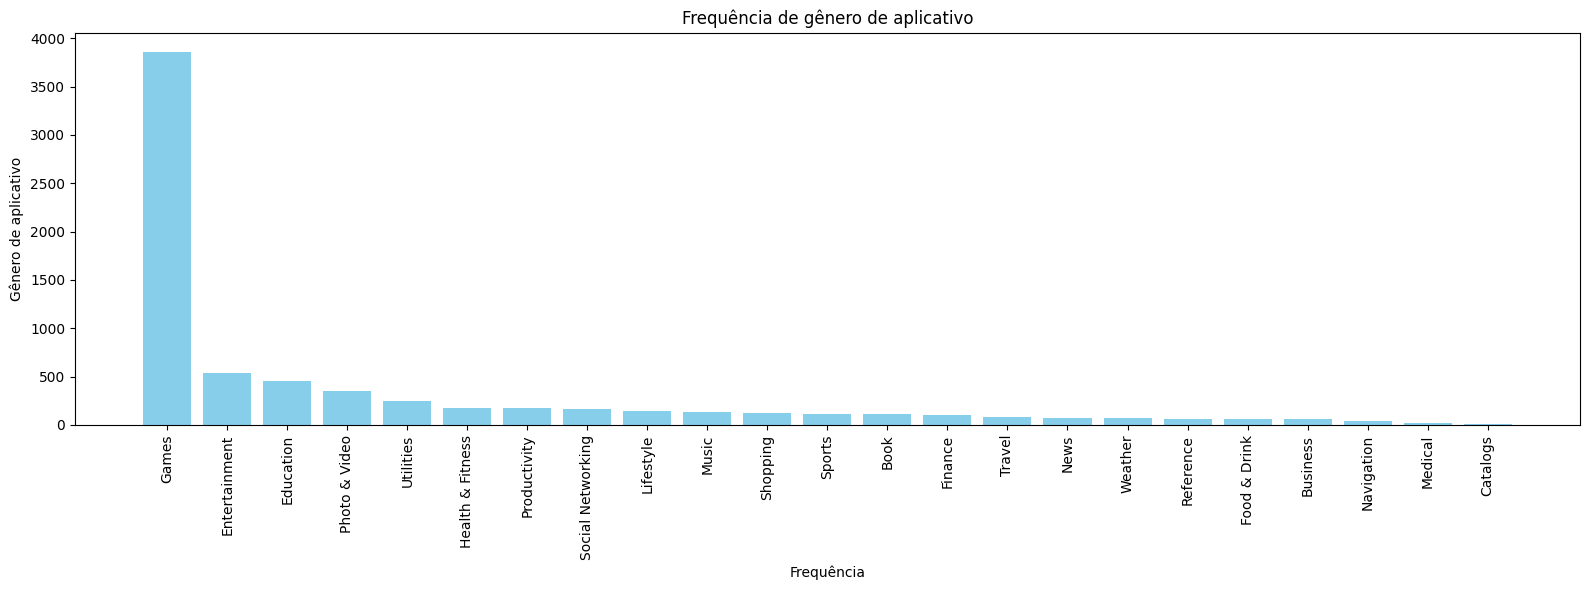

In [244]:
# Agrupando os dados
data_genre = data.groupby('prime_genre').size()

# Ordenando eles
data_genre = data_genre.sort_values(ascending=False)

# Construindo o gráfico
plt.figure(figsize=(16, 6))
plt.bar(data_genre.index, data_genre.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Frequência')
plt.ylabel("Gênero de aplicativo")
plt.title('Frequência de gênero de aplicativo')
plt.tight_layout()
plt.show()

In [245]:
# Mostrando os dados
data_genre

prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
dtype: int64

### 3.2. Qual gênero tem mais avaliação?

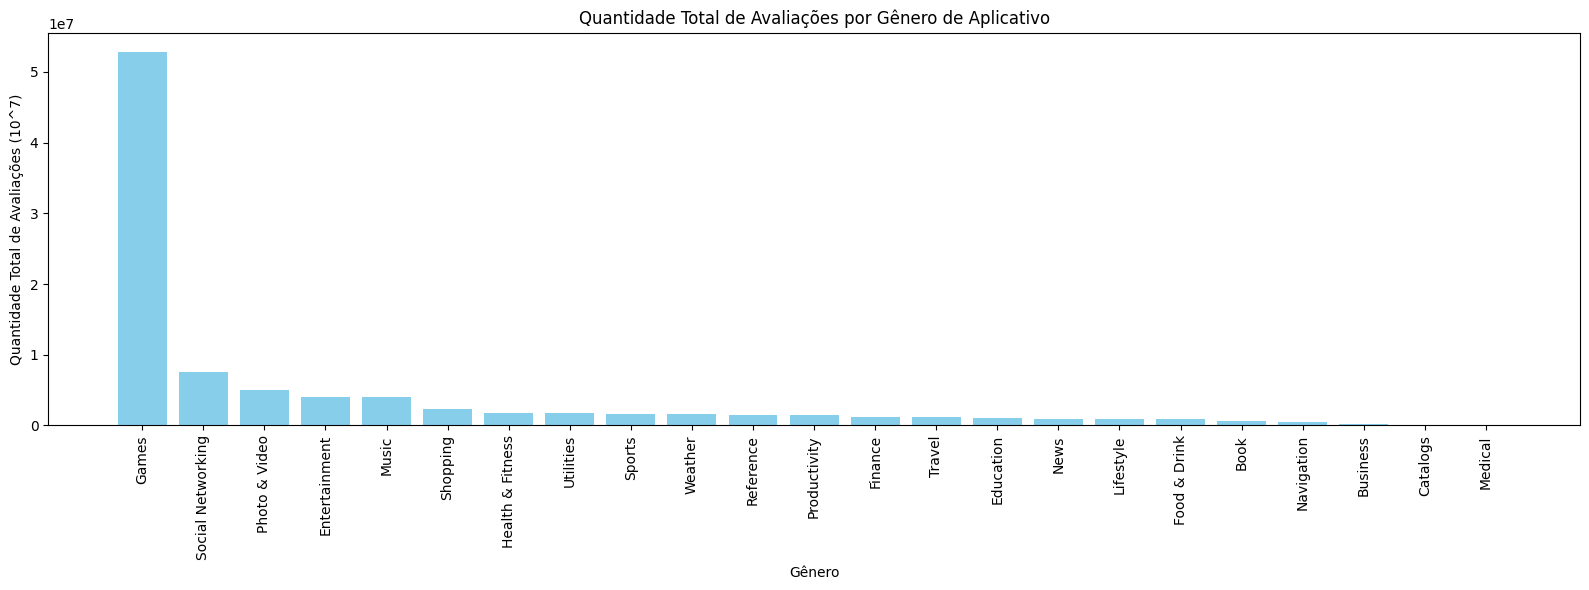

In [246]:
# Agrupando os dados
genre_ratings = data.groupby('prime_genre')['rating_count_tot'].sum()

# Ordenando os dados
genre_ratings = genre_ratings.sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(16, 6))
plt.bar(genre_ratings.index, genre_ratings.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Gênero')
plt.ylabel('Quantidade Total de Avaliações (10^7)')
plt.title('Quantidade Total de Avaliações por Gênero de Aplicativo')
plt.tight_layout()
plt.show()

In [247]:
# Mostrando os dados
genre_ratings

prime_genre
Games                52878491
Social Networking     7598316
Photo & Video         5008946
Entertainment         4030518
Music                 3980199
Shopping              2271070
Health & Fitness      1784371
Utilities             1702228
Sports                1599070
Weather               1597034
Reference             1434294
Productivity          1433136
Finance               1148956
Travel                1144485
Education             1014371
News                   976130
Lifestyle              887294
Food & Drink           878133
Book                   574049
Navigation             545282
Business               272921
Catalogs                17325
Medical                 13634
Name: rating_count_tot, dtype: int64

### 3.3. Qual é classificação de idade que mais predomina na Apple Store?

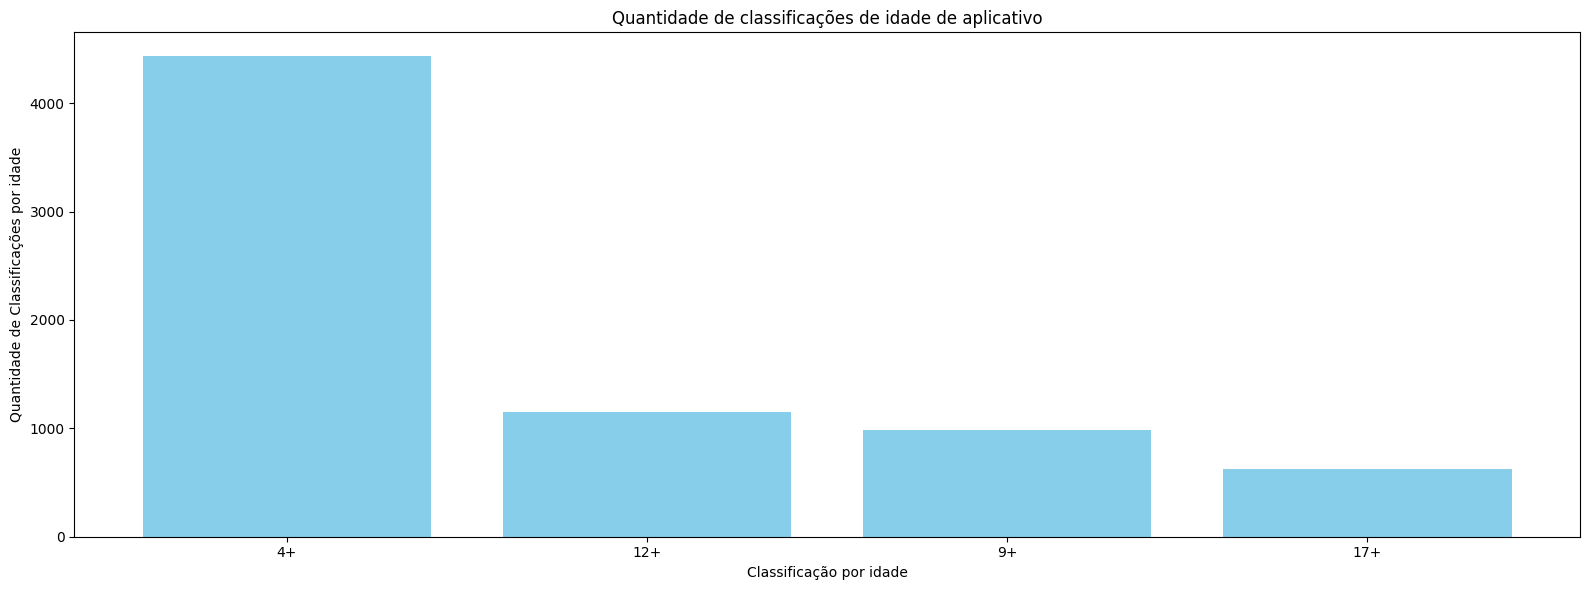

In [248]:
# Agrupando os dados
data_class = data.groupby('cont_rating').size()

# Ordenando os dados
data_class = data_class.sort_values(ascending=False)

# Construindo o gráfico
plt.figure(figsize=(16, 6))
plt.bar(data_class.index, data_class.values, color='skyblue')
plt.xlabel('Classificação por idade')
plt.ylabel('Quantidade de Classificações por idade')
plt.title('Quantidade de classificações de idade de aplicativo')
plt.tight_layout()
plt.show()

In [249]:
# Mostrando os dados
data_class

cont_rating
4+     4433
12+    1155
9+      987
17+     622
dtype: int64

### 3.4. Tem mais aplicativo pago ou gratuito?

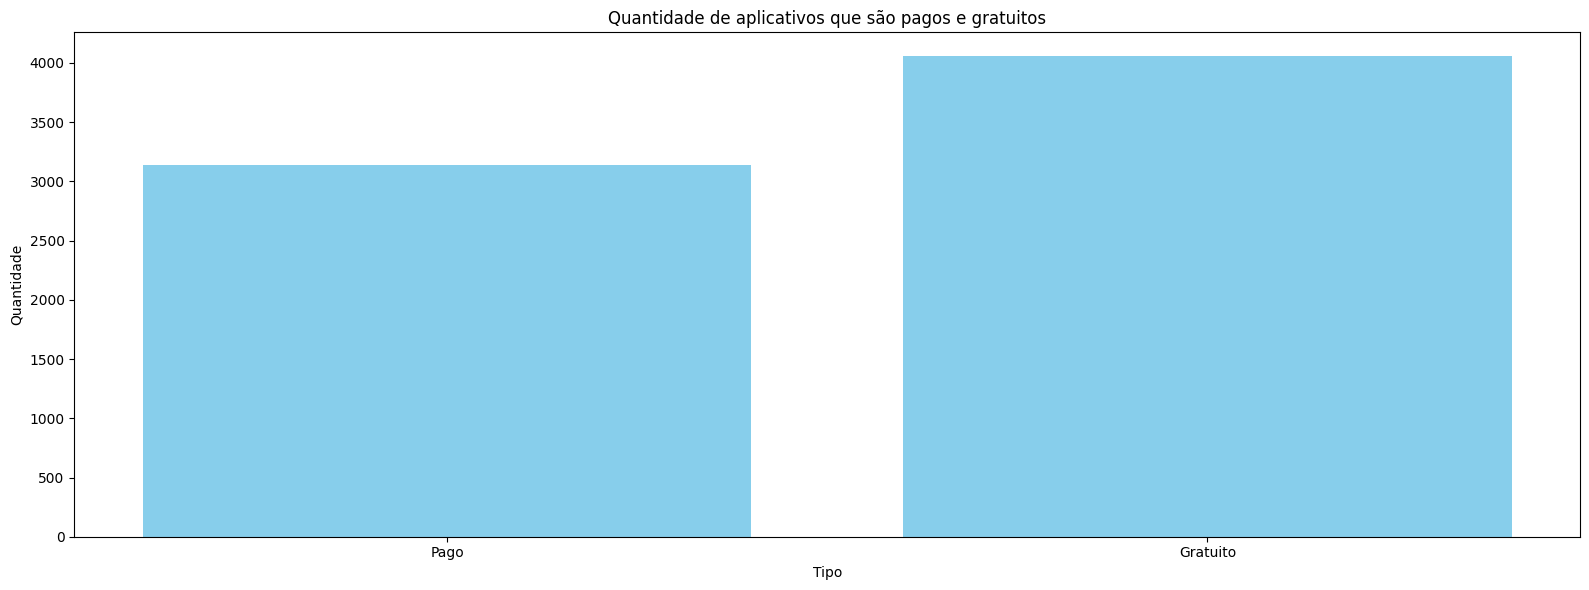

In [250]:
# Obtendo a quantidade entre pagos e gratuitos
qtd_pago = len(data[data['price'] > 0])
qtd_livre = len(data[data['price'] == 0])

# Criando o dataframe
df_valores = pd.DataFrame({'Tipo': ["Pago", "Gratuito"], 'Valores': [qtd_pago, qtd_livre]})

# Construindo o gráfico
plt.figure(figsize=(16, 6))
plt.bar(df_valores['Tipo'], df_valores['Valores'], color='skyblue')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.title('Quantidade de aplicativos que são pagos e gratuitos')
plt.tight_layout()
plt.show()

### 3.5. Entre os aplicativos pagos, qual é o gênero com maior receita?

In [251]:
# Obtendo apenas os dados pagos
data_price = data[data['price'] > 0]

# Mostrando a nova tabela
data_price

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
11,Fruit Ninja Classic,104590336,1.99,698516,132,4.5,4.0,2.3.9,4+,Games,38,5,13,1
17,Clear Vision (17+),37879808,0.99,541693,69225,4.5,4.5,1.1.3,17+,Games,43,5,1,1
18,Minecraft: Pocket Edition,147787776,6.99,522012,1148,4.5,4.5,1.1,9+,Games,37,1,11,1
28,Plants vs. Zombies,105379840,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
37,Doodle Jump,48741376,0.99,395261,88,4.5,4.5,3.17.6,4+,Games,37,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7181,Bestshot: Take Clear Photos Automatically & Ea...,24675328,0.99,0,0,0.0,0.0,2.0.2,4+,Photo & Video,37,0,2,1
7182,Be-be-bears!,480781312,2.99,0,0,0.0,0.0,1.0.2.5,4+,Games,35,5,13,1
7184,弑仙问情,151494656,0.99,0,0,0.0,0.0,1,9+,Games,40,5,1,1
7186,Hey Duggee: We Love Animals,136347648,2.99,0,0,0.0,0.0,1.2,4+,Games,40,5,1,1


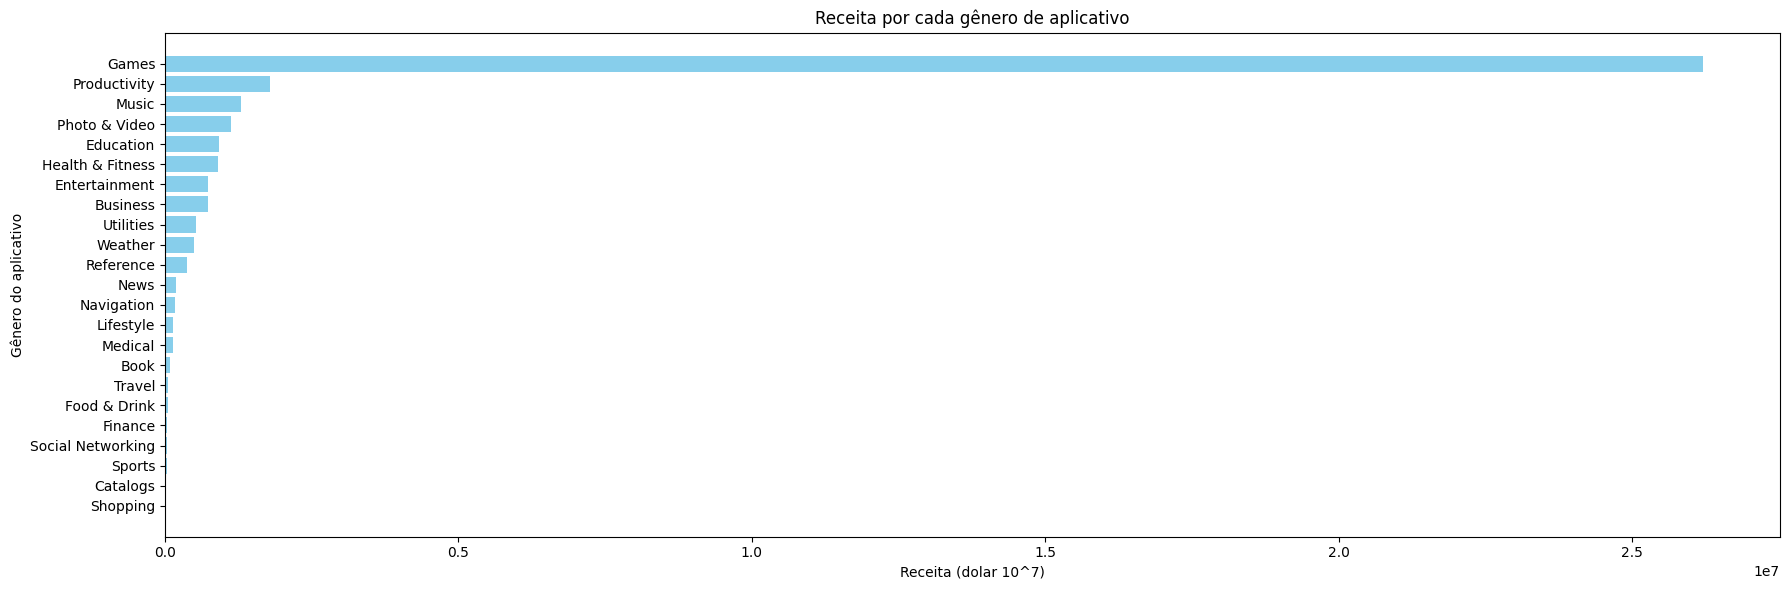

In [252]:
# Criando um novo dataframe com as colunas para fazer o cálculo da receita
data_price = data_price[['price', 'rating_count_tot', 'prime_genre']]

# Multiplicando o preço pelas avaliações (considerando que cada avaliação é uma pessoa)
data_price['total value'] = data_price['price'] * data_price['rating_count_tot']

# Group Data Price
gdp = data_price.groupby('prime_genre')['total value'].sum()

# Ordenando os dados
gdp = gdp.sort_values(ascending=True)

# Construindo o gráfico
plt.figure(figsize=(18, 6))
plt.barh(gdp.index, gdp.values, color='skyblue')
plt.xlabel('Receita (dolar 10^7)')
plt.ylabel('Gênero do aplicativo')
plt.title('Receita por cada gênero de aplicativo')
plt.tight_layout()
plt.show()

In [253]:
# Mostrando os dados
gdp

prime_genre
Shopping                 5416.78
Catalogs                10458.91
Sports                  29413.19
Social Networking       39196.66
Finance                 40822.14
Food & Drink            47628.68
Travel                  57228.12
Book                    90395.41
Medical                129859.44
Lifestyle              133064.67
Navigation             175591.59
News                   186763.48
Reference              366515.64
Weather                495965.15
Utilities              533624.73
Business               733893.35
Entertainment          739470.51
Health & Fitness       906875.05
Education              922053.85
Photo & Video         1121039.86
Music                 1293572.97
Productivity          1780758.05
Games                26210820.32
Name: total value, dtype: float64

### 3.6. Quais são os aplicativos que possuem a maior receita referente ao seu gênero?

In [256]:
# Busco apenas por dados que possuem preços
app_price = data[data['price'] > 0]

# C
app_price = app_price[['price', 'rating_count_tot', 'prime_genre', 'track_name']]

app_price['total value'] = app_price['price'] * app_price['rating_count_tot']

genres = app_price['prime_genre'].unique()

df_ = {
    'total value': [],
    'name': []
}

for x in genres:
  temp = app_price[app_price['prime_genre'] == x].max()
  df_['total value'].append(temp['total value'])
  df_['name'].append('(' + x + ') ' + temp['track_name'])

data_ = pd.DataFrame(df_)

# Infelizmente não consegui encontrar uma maneira de exibir o gráfico do matplotlib com caracteres chineses ou japoneses
data_ = data_.sort_values('total value', ascending=False)
data_

,total value,name
0,3648863.88,(Games) ＣＲスーパー海物語ＩＮ沖縄４
2,715373.91,(Music) iReal Pro - Music Book & Play Along
9,193242.27,(Education) 零基础学音标
1,185653.71,(Entertainment) 椅子ドンVR~一ノ宮英介 編~
11,175764.06,(Productivity) 我的密码-极简账号备忘录，安全记录管家
5,146586.24,(Business) iScanner - PDF Document Scanner App
6,142200.03,(Weather) 雨时
4,141910.61,(Health & Fitness) 美柚经期助手(专业版)-月经·生理期预测，还能备孕育儿
3,115177.22,"(Photo & Video) 自动证件照 - 智能证件照相机美图美颜编辑,制作学生证件照"
7,104545.49,(Utilities) 面倒だがトリあえずキーボード ～ さわりたくなるキーボード


# Modelagem estatística

Pipeline

1. Pré-processamento
2. Machine Learning

## 1. Pré-processamento

In [ ]:
# Selecionando os dados que usarei para criar o modelo
data_ml = data[['price', 'cont_rating', 'prime_genre', 'sup_devices.num', 'lang.num', 'rating_count_tot', 'vpp_lic', 'ipadSc_urls.num']]
data_ml

,price,cont_rating,prime_genre,sup_devices.num,lang.num,rating_count_tot,vpp_lic,ipadSc_urls.num
0,0.0,4+,Social Networking,37,29,2974676,1,1
1,0.0,12+,Photo & Video,37,29,2161558,1,0
2,0.0,9+,Games,38,18,2130805,1,5
3,0.0,9+,Games,40,1,1724546,1,5
4,0.0,12+,Music,37,1,1126879,1,4
...,...,...,...,...,...,...,...,...
7192,0.0,4+,Games,38,1,0,1,5
7193,0.0,9+,Book,38,1,0,1,0
7194,0.0,12+,Games,37,2,0,1,2
7195,0.0,12+,Entertainment,40,1,0,1,0


In [ ]:
# Aqui os dados são numéricos. Não se precisa pre-processar nada
data_ml['price'].describe()

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

In [ ]:
# Aqui os dados são categóricos. Precisamos pré-processar
print('Antes do pré-processamento')
print(data_ml['cont_rating'].describe())

data_ml['cont_rating'].describe()

tags = data_ml['cont_rating'].unique()

for i, tag in enumerate(tags):
  data_ml['cont_rating'] = data_ml['cont_rating'].replace(tag, i)

print('\nDepois do pré-processamento')
print(data_ml['prime_genre'].describe())

Antes do pré-processamento
count     7197
unique       4
top         4+
freq      4433
Name: cont_rating, dtype: object

Depois do pré-processamento
count      7197
unique       23
top       Games
freq       3862
Name: prime_genre, dtype: object


In [ ]:
# Aqui os dados são categóricos. Precisamos pré-processar
print('Antes do pré-processamento')
print(data_ml['prime_genre'].describe())

tags = data_ml['prime_genre'].unique()

for i, tag in enumerate(tags):
  data_ml['prime_genre'] = data_ml['prime_genre'].replace(tag, i)

print('\nDepois do pré-processamento')
print(data_ml['prime_genre'].describe())

Antes do pré-processamento
count      7197
unique       23
top       Games
freq       3862
Name: prime_genre, dtype: object

Depois do pré-processamento
count    7197.000000
mean        5.980270
std         6.071846
min         0.000000
25%         2.000000
50%         2.000000
75%        11.000000
max        22.000000
Name: prime_genre, dtype: float64


In [ ]:
# Aqui os dados são numéricos. Não se precisa pre-processar nada
data_ml['sup_devices.num'].describe()

count    7197.000000
mean       37.361817
std         3.737715
min         9.000000
25%        37.000000
50%        37.000000
75%        38.000000
max        47.000000
Name: sup_devices.num, dtype: float64

In [ ]:
# Aqui os dados são numéricos. Não se precisa pre-processar nada
data_ml['lang.num'].describe()

count    7197.000000
mean        5.434903
std         7.919593
min         0.000000
25%         1.000000
50%         1.000000
75%         8.000000
max        75.000000
Name: lang.num, dtype: float64

In [ ]:
# Fazer a nova visualização com os dados já pré-processados
data_ml

,price,cont_rating,prime_genre,sup_devices.num,lang.num,rating_count_tot,vpp_lic,ipadSc_urls.num
0,0.0,0,0,37,29,2974676,1,1
1,0.0,1,1,37,29,2161558,1,0
2,0.0,2,2,38,18,2130805,1,5
3,0.0,2,2,40,1,1724546,1,5
4,0.0,1,3,37,1,1126879,1,4
...,...,...,...,...,...,...,...,...
7192,0.0,0,2,38,1,0,1,5
7193,0.0,2,16,38,1,0,1,0
7194,0.0,1,2,37,2,0,1,2
7195,0.0,1,13,40,1,0,1,0


## 2. Machine Learning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Separando os dados entre X e Y

X = data_ml[['price', 'cont_rating', 'prime_genre', 'sup_devices.num', 'lang.num', 'vpp_lic', 'ipadSc_urls.num']]
y = data_ml[['rating_count_tot']]

In [ ]:
# Transformando em uma mesma escala

std_s = StandardScaler()
X_scaled = std_s.fit_transform(X)

In [ ]:
# Decompondo em 3 componentes

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Separando dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.7, random_state=42)

In [ ]:
# Criando o modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Avaliando o modelo

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(mse)

2620556000.4925084
